In [41]:
import torch
import matplotlib.pyplot as plt

from spectralwaste_segmentation import models, datasets, utils

In [42]:
experiments = [
    'mininet.rgb.labels_rgb.b86a',
    'mininet.hyper.labels_hyper_lt.009d',
    'mininet.hyper_pca3.labels_hyper_lt.3b56',
    'mininet_multimodal.rgb,hyper.labels_rgb.3154',
    'mininet_multimodal.rgb,hyper_pca3.labels_rgb.8fad',

    'segformer_b0.rgb.labels_rgb.57a9',
    'segformer_b0.hyper.labels_hyper_lt.ead7',
    'segformer_b0.hyper_pca3.labels_hyper_lt.ee6f',
    'segformer_b0_multimodal.rgb,hyper.labels_rgb.451d',
    'segformer_b0_multimodal.rgb,hyper_pca3.labels_rgb.4cff',

    'cmx_b0.rgb,hyper.labels_rgb.b5c4',
    'cmx_b0.rgb,hyper_pca3.labels_rgb.55b1',
]

Namespace(model='mininet', results_path='results', device='cuda', start_epoch=0, max_epoch=200, batch_size=12, input_mode='rgb', target_mode='labels_rgb', resume='', test_only=False, wandb='spectralwaste_iros2024', experiment_name='mininet.rgb.labels_rgb.b86a', data_path='data/spectralwaste_segmentation')
Namespace(model='mininet', results_path='results', device='cuda', start_epoch=0, max_epoch=200, batch_size=12, input_mode='hyper', target_mode='labels_hyper_lt', resume='', test_only=False, wandb='spectralwaste_iros2024', experiment_name='mininet.hyper.labels_hyper_lt.009d', data_path='data/spectralwaste_segmentation')
Namespace(model='mininet', results_path='results', device='cuda', start_epoch=0, max_epoch=200, batch_size=12, input_mode='hyper_pca3', target_mode='labels_hyper_lt', resume='', test_only=False, wandb='spectralwaste_iros2024', experiment_name='mininet.hyper_pca3.labels_hyper_lt.3b56', data_path='data/spectralwaste_segmentation')
Namespace(model='mininet_multimodal', res

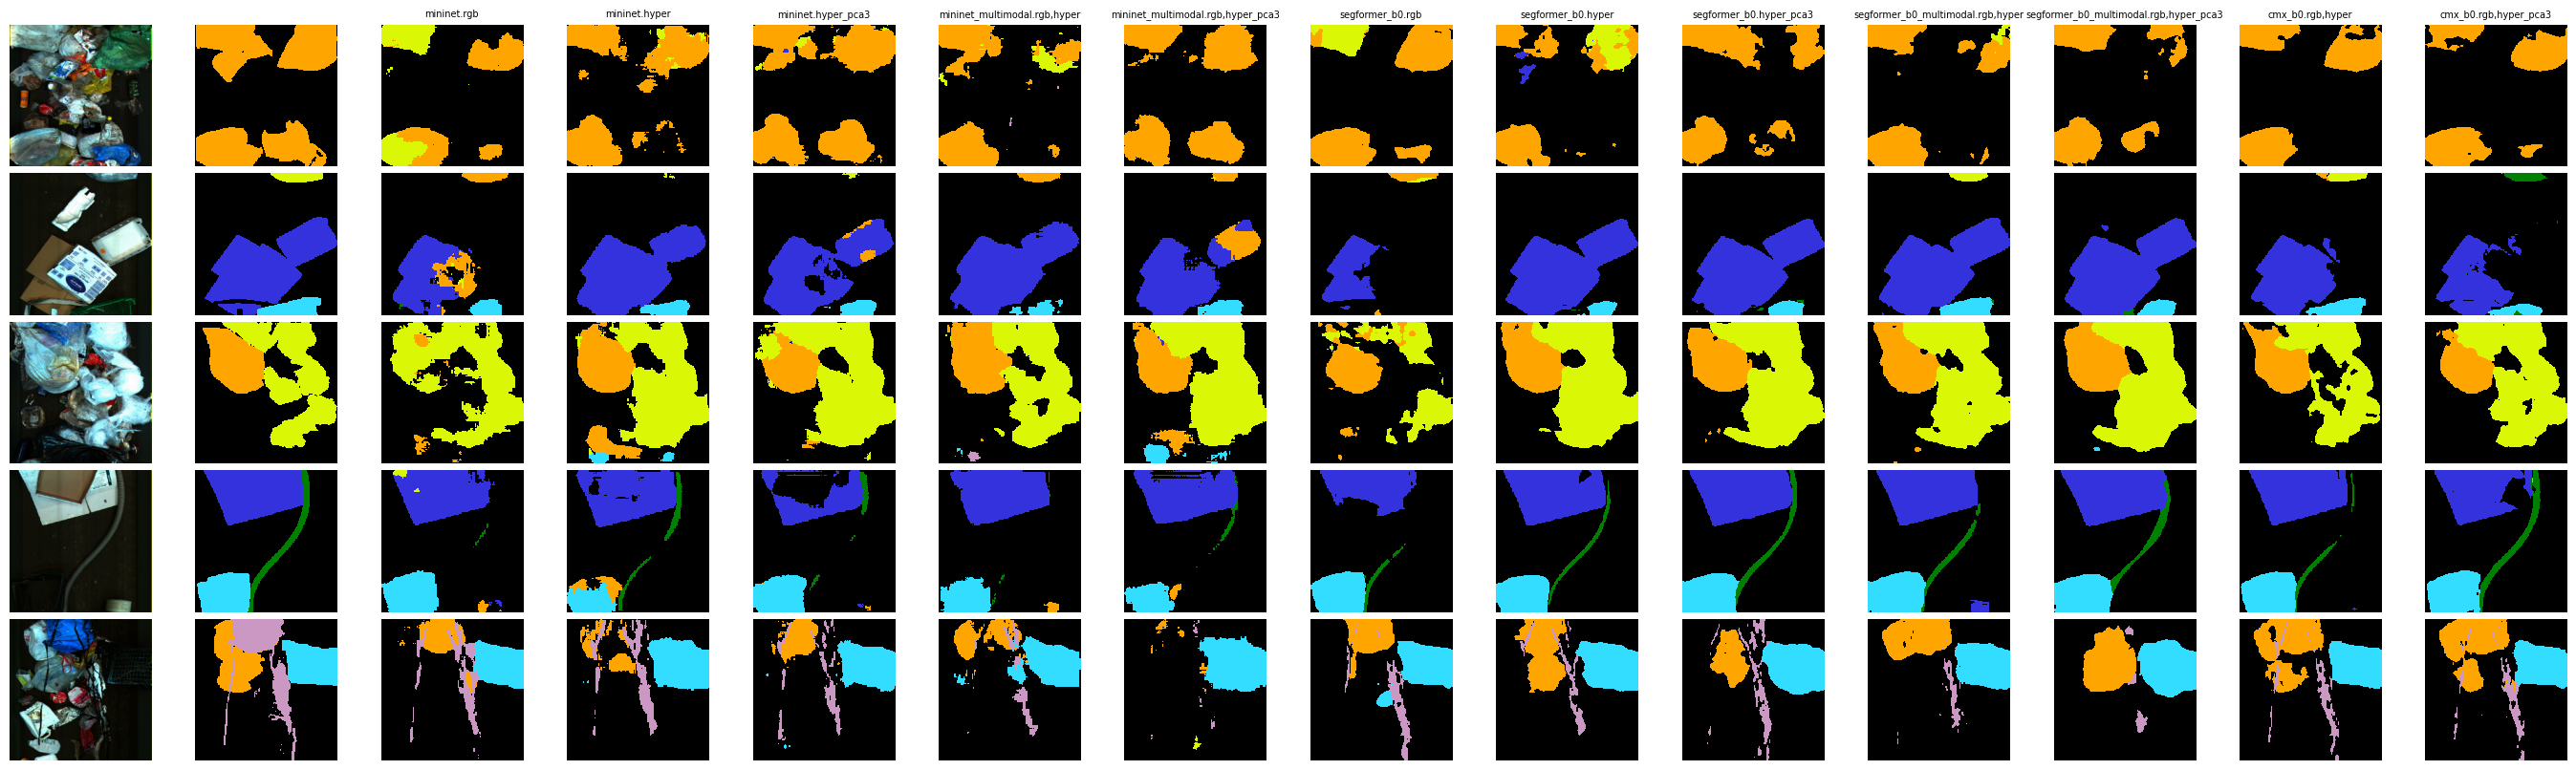

In [43]:
input_idxs = [0, 165, 79, 166, 118]

fig, axs = plt.subplots(len(input_idxs), len(experiments) + 2, figsize=(35, 10), squeeze=False, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

for i, name in enumerate(experiments):
    checkpoint = torch.load(f'../data/checkpoints_iros2024/{name}.pth')
    args = checkpoint['args']
    print(args)

    data = datasets.SpectralWasteSegmentation('../data/spectralwaste_segmentation', split='test', input_mode=args.input_mode, target_mode=args.target_mode, target_type='')

    model = models.create_model(args.model, data.num_channels, data.num_classes)
    model.load_state_dict(checkpoint['model'])

    model.eval()

    for j, idx in enumerate(input_idxs):
        with torch.inference_mode():
            input, target = data[idx][0], data[idx][1]

            if isinstance(input, list):
                input = [i.unsqueeze(0) for i in input]
            else:
                input = input.unsqueeze(0)

            out = model(input)
            out = out.argmax(dim=1).squeeze()

        if i == 0:
            # plot rgb
            axs[j, 0].imshow(input[0].permute(1, 2, 0))
            axs[j, 0].axis('off')
            axs[j, 1].imshow(utils.get_color_labels(target, data.palette), interpolation='none')
            axs[j, 1].axis('off')

        axs[j, i+2].imshow(utils.get_color_labels(out, data.palette), interpolation='none')
        axs[j, i+2].axis('off')

    title = f"{args.model}.{','.join(args.input_mode) if isinstance(args.input_mode, list) else args.input_mode}"
    axs[0, i+2].set_title(title, fontsize=7)